<a href="https://colab.research.google.com/github/PedroHeinrickg/Analise-Titanic-/blob/main/Analise_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISE TITANIC ⚓

Este notebook tem como objetivo **realizar o tratamento dos dados e analisar possíveis correlações entre os sobreviventes** do Titanic utilizando a base de dados "Titanic - Machine Learning from Disaster" do Kaggle.

Disponível em: https://www.kaggle.com/competitions/titanic

In [63]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# ANÁLISE DE LINHAS E COLUNAS VAZIAS
Nesta análise foi verificado o valor relativo (%) de células vazias.
A coluna "Cabin" apresenta a maior quantidade de espaços NÃO preenchidos, sendo 77,1%, portanto irei remover esta coluna. Para as demais colunas irei imputar os dados para seu preenchimento com base na mediana.

In [64]:
df.isna().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [65]:
df['Age'].median()

28.0

In [66]:
#Preenchimento da coluna 'Age'
mediana = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana)
df.isna().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# VERIFICANDO A MEDIANA DE IDADE POR CLASSE E SEXO

In [68]:
df_idade = df.groupby(['Pclass', 'Sex'], as_index=False) ['Age'].mean()
df_idade

,Pclass,Sex,Age
0,1,female,33.978723
1,1,male,38.995246
2,2,female,28.703947
3,2,male,30.512315
4,3,female,23.572917
5,3,male,26.911873


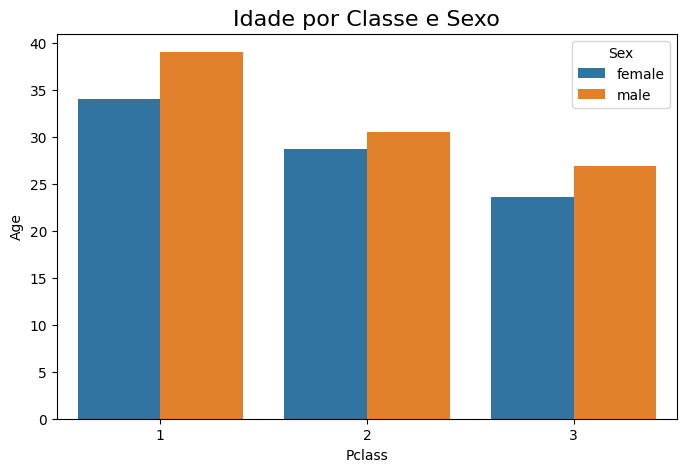

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Usando seaborn para plotar o gráfico de barras
sns.barplot(x='Pclass', y='Age', hue='Sex', data=df_idade, ax=ax)

# Definindo o título do gráfico
ax.set_title('Idade por Classe e Sexo', fontsize=16)

# Exibindo o gráfico
plt.show()

# ANALISANDO A TAXA DE SOBREVIVÊNCIA POR SEXO

<ipython-input-81-922b12c02579>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df_plot, palette=cores)


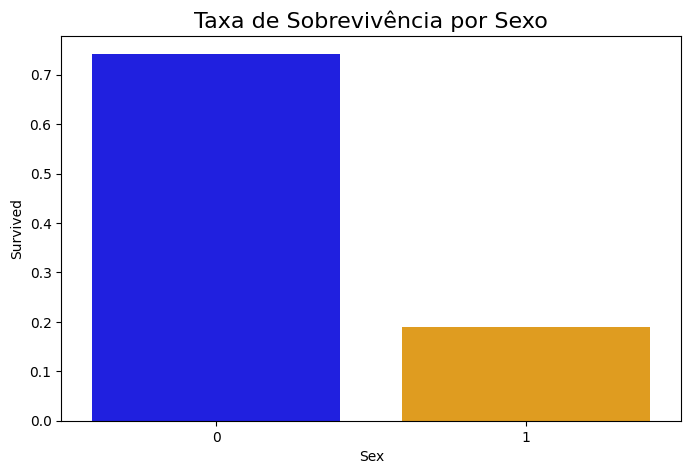

In [81]:

import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df.groupby('Sex', as_index=False)['Survived'].mean()

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Definindo as cores das barras
cores = ['blue', 'orange']

# Usando seaborn para plotar o gráfico de barras
sns.barplot(x='Sex', y='Survived', data=df_plot, palette=cores)

# Definindo o título do gráfico
ax.set_title('Taxa de Sobrevivência por Sexo', fontsize=16)

# Exibindo o gráfico
plt.show()

#VERIFICANDO A CORRELAÇÃO DE SOBREVIVÊNCIA COM OUTROS FATORES

In [77]:
#Definindo uma nova função
def label_encoder(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  for column in columns_to_encode:
    if column in df.columns:
      df[column] = le.fit_transform(df[column])

    else:
      print('A lista possui colunas que não existem no DataFrame')

  return df

#Codificando em números inteiros os dados nominais
colunas_a_codificar = ['Sex']
label_encoder(df, colunas_a_codificar)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df_analise = df.drop(['Name', 'Cabin', 'Embarked', 'Ticket', 'PassengerId'], axis = 1)
df_analise

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


<Axes: >

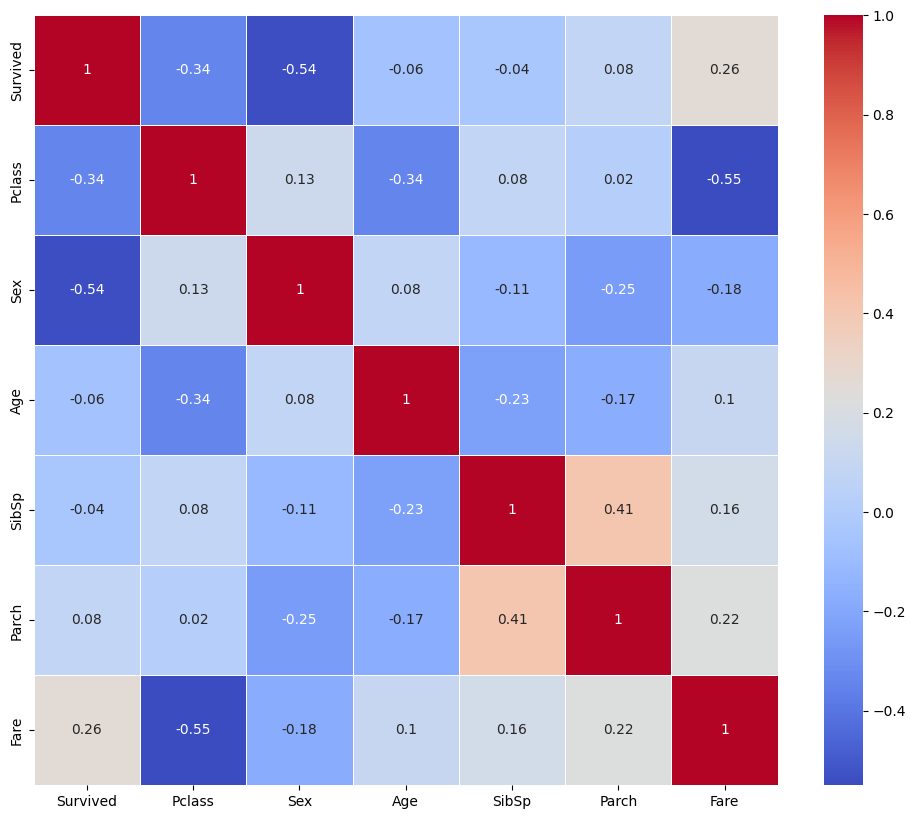

In [80]:
#Criando a a função de correlação com o uso de 2 casas decimais.
correlation_matrix = df_analise.corr().round(2)

#Criação do gráfico
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

#CONCLUSÃO

De acordo com o índice, foi definido que mulheres=0 e homens=1. De acordo com o gráfico de correlação, existe uma correlação negativa entre o sexo e sobrevivência, sendo assim quanto menor o número representante do sexo, maior a taxa de sobrevivência. Portanto sobreviveram mais mulheres, em relação aos homens.

Outra correlação encontrada com a sobrevivência foi o 'Pclass', que também apresenta uma correlação negativa. No índice do 'Pclass', quanto mais baixo o número, melhor o Ticket Class. Portanto quanto maior o Ticket Class, maior a taxa de sobrevivência.